In [1]:
!pip install tensorflow==2.12.0
!pip install keras==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 7.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Un

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
# Import specific classifiers and libraries for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import  StratifiedKFold
from sklearn.datasets import make_classification
import pickle
import warnings
warnings.simplefilter(action='ignore')  # Ignore warnings for cleaner output
sns.set()
plt.style.use("ggplot")
%matplotlib inline


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.initializers import RandomNormal
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from keras.optimizers import Adam, RMSprop
from imblearn.over_sampling import SMOTE


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 12.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [4]:
#Load the diabetes dataset
df=pd.read_csv("/content/diabetes.csv")

In [5]:
# Display first few rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#display the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#display column names of the dataset
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# Display descriptive statistics of the dataset
#summary statistics of numeric columns
df.describe()
#Display dimensions of dataset
df.shape

(768, 9)

In [9]:
#Distribution of the outcome variable (percentage)
df.Outcome.value_counts() * 100 / len(df)
df['Outcome'].value_counts() * 100 / len(df)

,count
Outcome,
0,65.104167
1,34.895833


<Axes: xlabel='Age', ylabel='Density'>

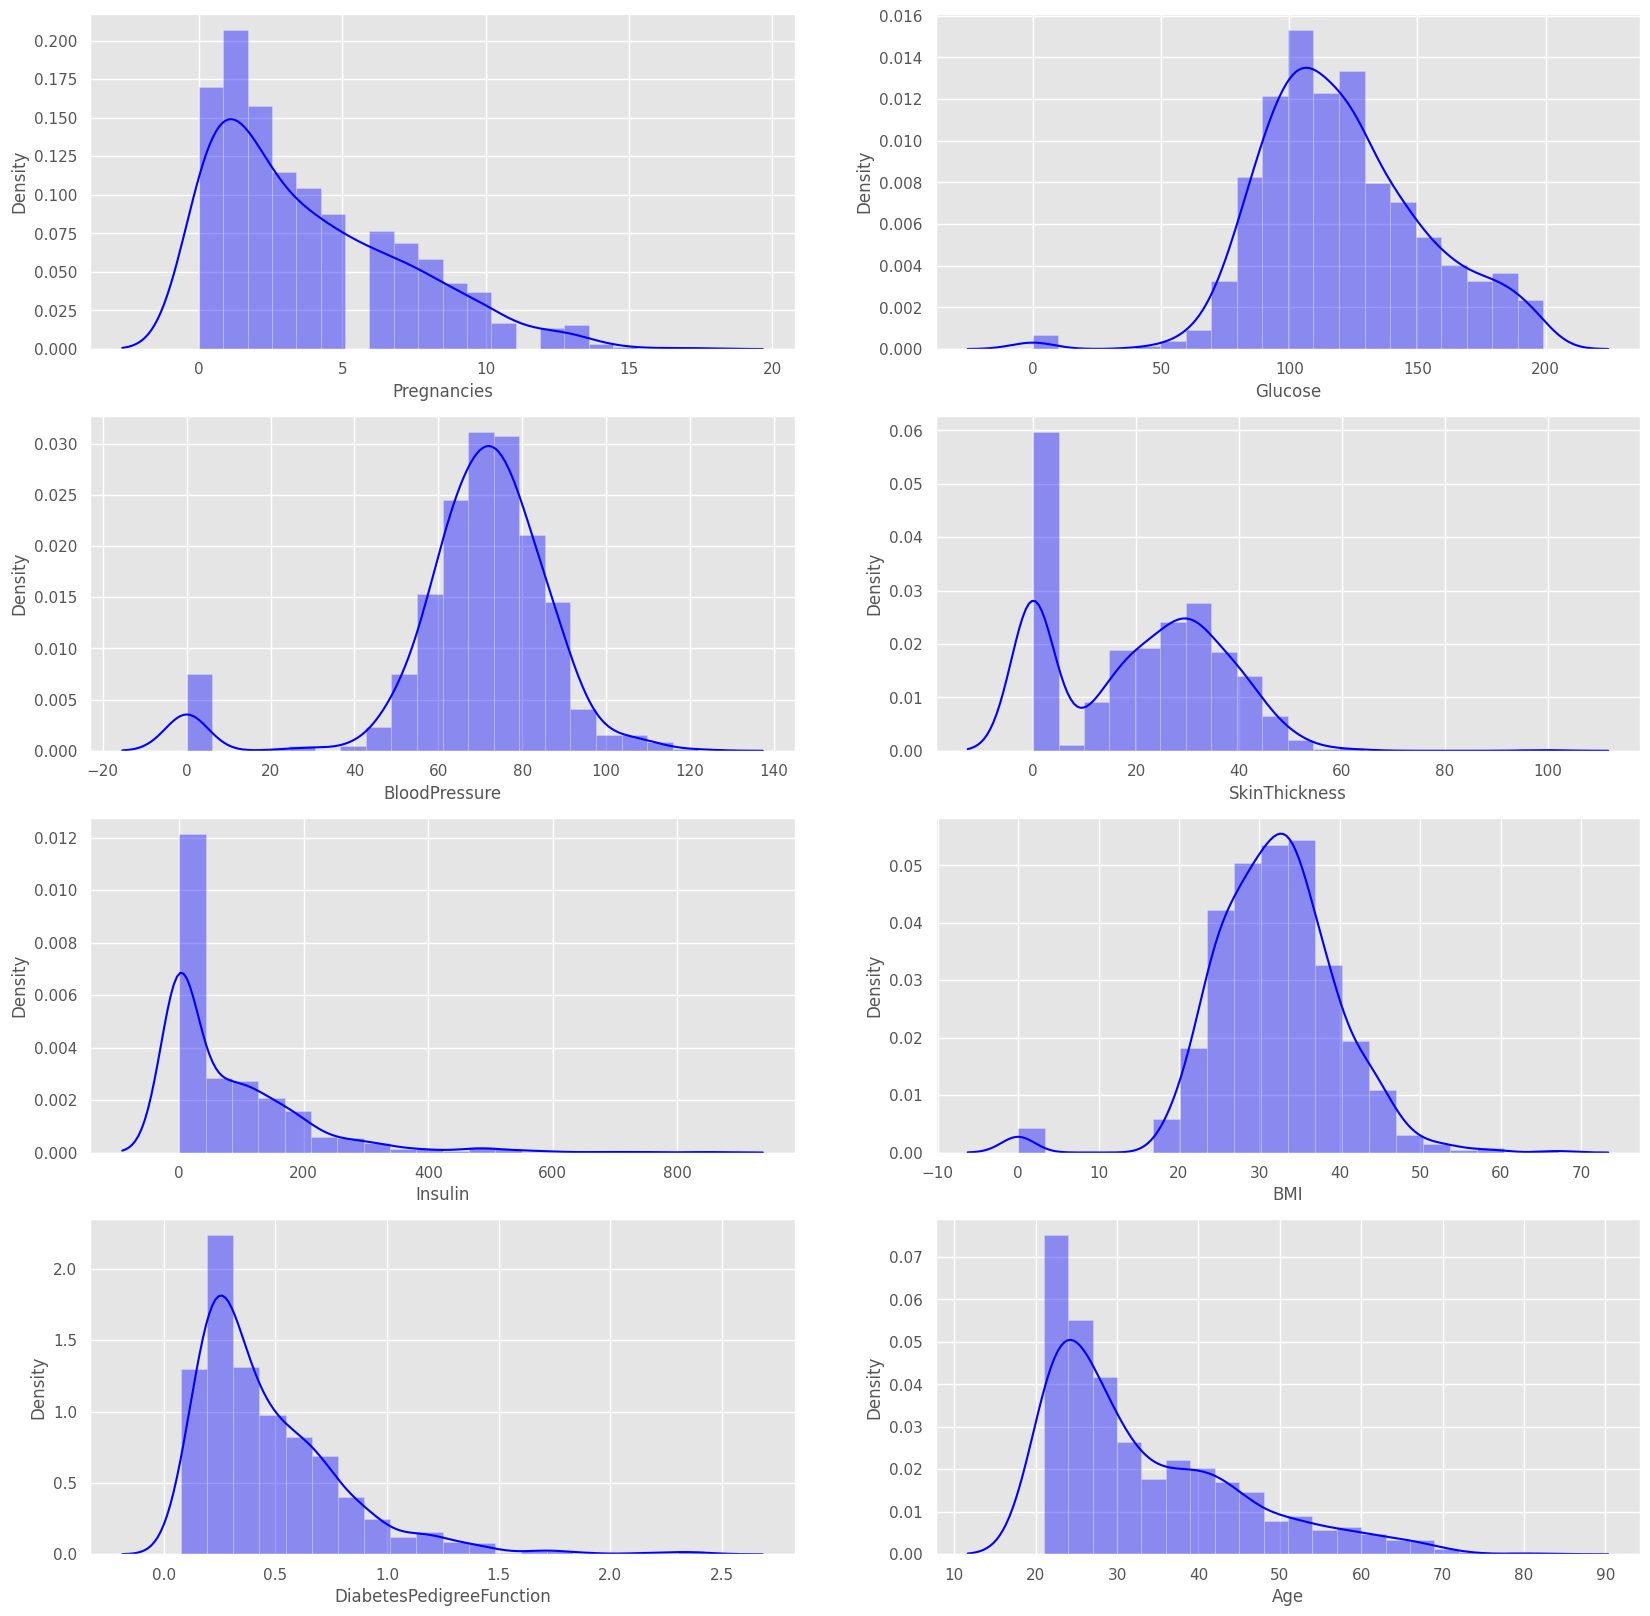

In [10]:
#Density plots for each numeric feature grouped by 'Outcome'
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0, 0], color="blue")
sns.distplot(df.Glucose, bins=20, ax=ax[0, 1], color="blue")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1, 0], color="blue")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1, 1], color="blue")
sns.distplot(df.Insulin, bins=20, ax=ax[2, 0], color="blue")
sns.distplot(df.BMI, bins=20, ax=ax[2, 1], color="blue")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3, 0], color="blue")
sns.distplot(df.Age, bins=20, ax=ax[3, 1], color="blue")

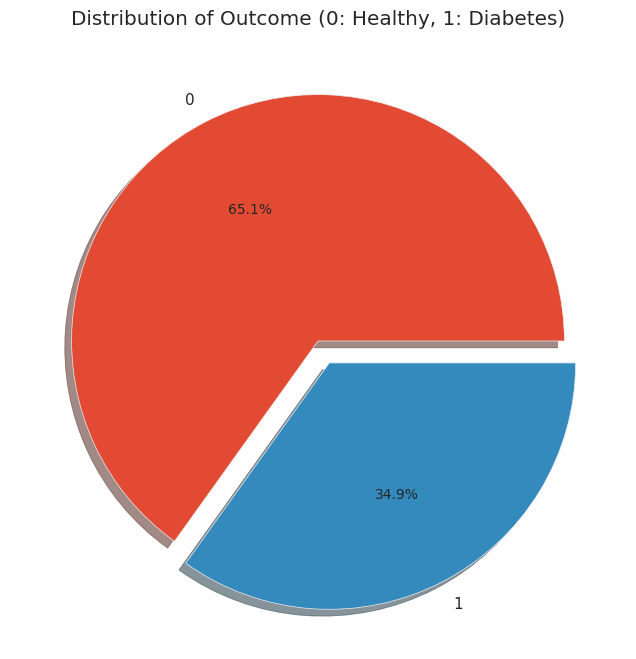

In [11]:
# Pie chart showing the distribution of Öutcome variable
plt.figure(figsize=(8, 8))
df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Outcome (0: Healthy, 1: Diabetes)')
plt.ylabel('')
plt.show()


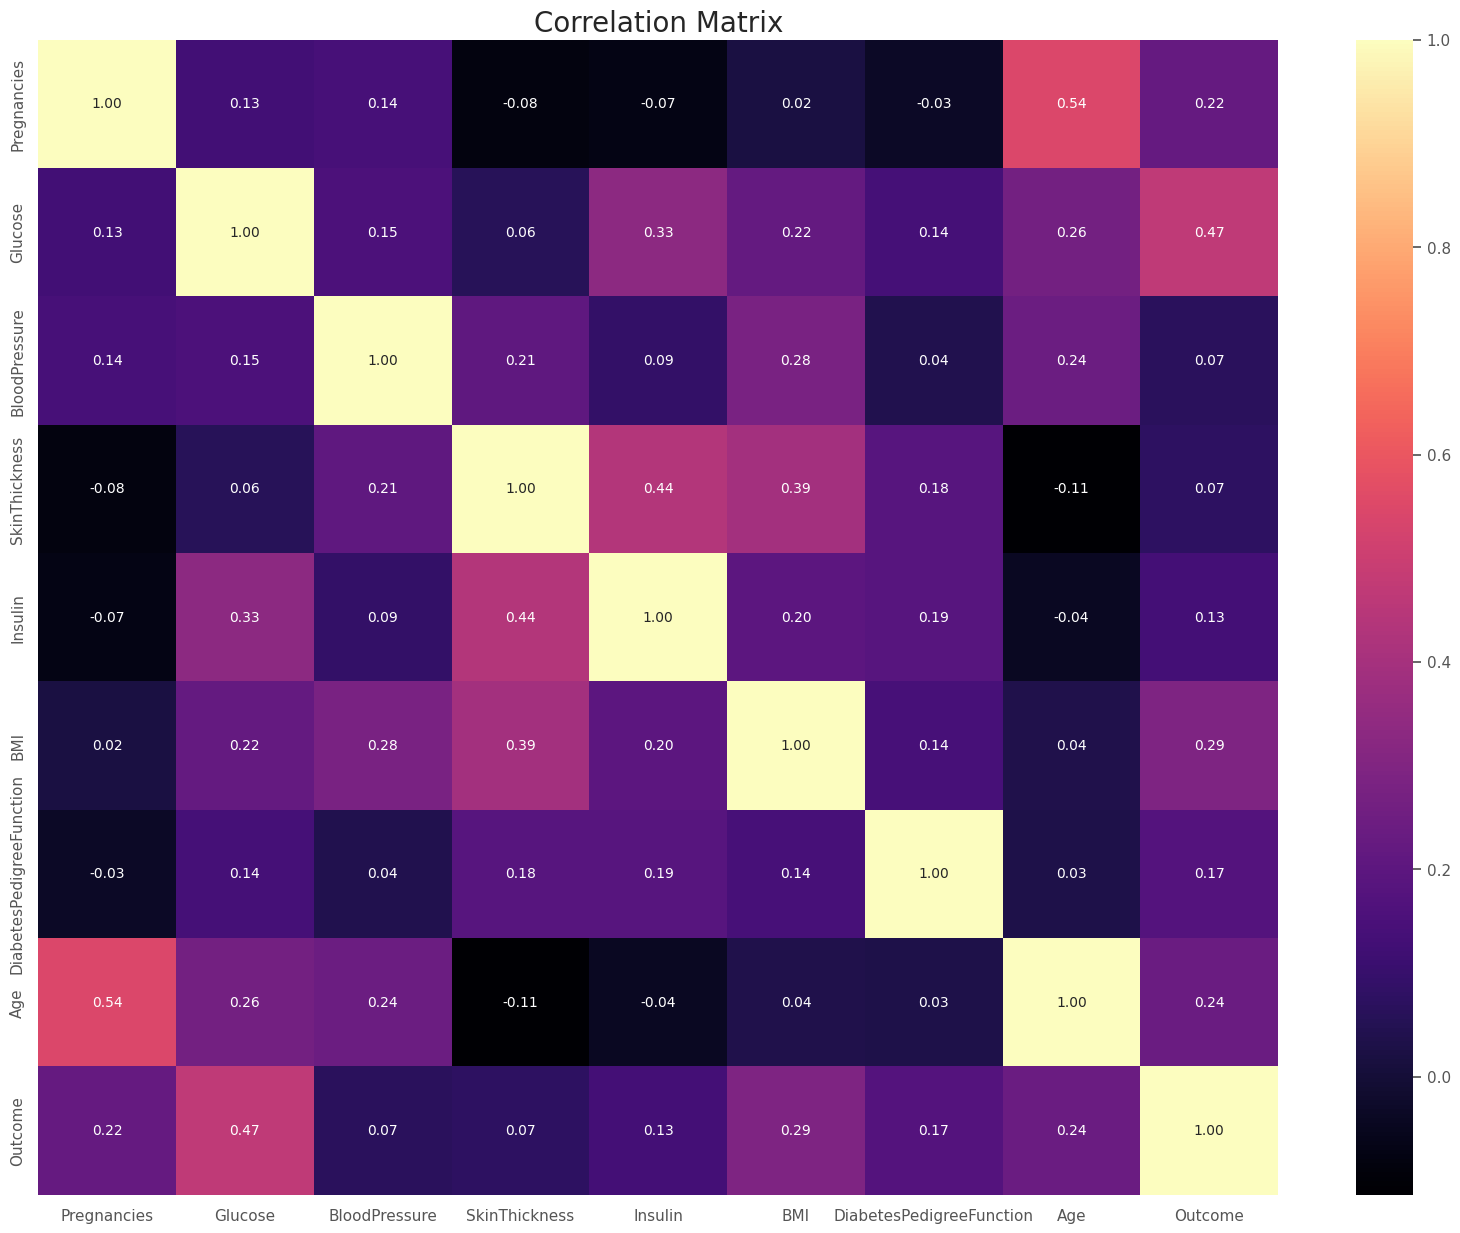

In [12]:
#Correlation matrix heatmap
f, ax = plt.subplots(figsize=[20, 15])
sns.heatmap(df.corr(), annot=True, fmt='.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [13]:
# Replace zeo value with NaN
columns_to_replace_zero = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[columns_to_replace_zero] = df[columns_to_replace_zero].replace(0, np.NaN)

In [14]:
#Check for missing values after replacing zero with NaN
df.isnull().sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [15]:
print(df['Outcome'].isnull().sum())  # Ensure no missing values in Outcome
print(df['Outcome'].value_counts())

0
Outcome
0    500
1    268
Name: count, dtype: int64


In [16]:
#Impute missing values using median of each feature grouped by Outcome
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

for i in columns_to_replace_zero:
    temp = median_target(i)
    df.loc[(df['Outcome'] == 0) & (df[i].isnull()), i] = temp.loc[0, i]
    df.loc[(df['Outcome'] == 1) & (df[i].isnull()), i] = temp.loc[1, i]

In [17]:
#Check for missing values after imputation

df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [18]:
print(df['Outcome'].isnull().sum())  # Ensure no missing values in Outcome
print(df['Outcome'].value_counts())

0
Outcome
0    500
1    268
Name: count, dtype: int64


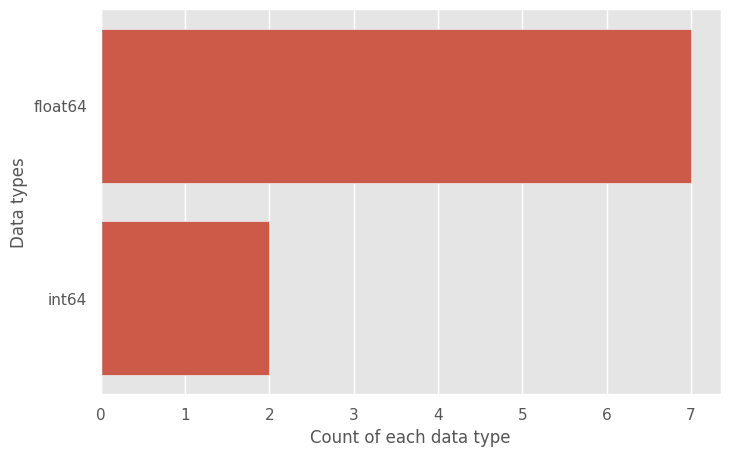

In [19]:
# Data type analysis: Count of each data type
plt.figure(figsize=(8, 5))
sns.countplot(y=df.dtypes, data=df)
plt.xlabel("Count of each data type")
plt.ylabel("Data types")
plt.show()

<Axes: xlabel='Outcome'>

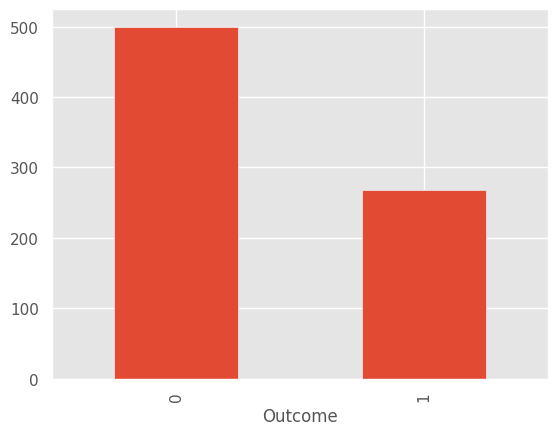

In [20]:
# Bar plot showing the count of outcomes (0: Healthy, 1: Diabetes)
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
df['Outcome'].value_counts().plot(kind="bar")


In [21]:
# Outlier detection using IQR method
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 2.0 * IQR  # Instead of 1.5 * IQR
    upper = Q3 + 2.0 * IQR  # Instead of 1.5 * IQR

    if df[(df[feature] > upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


In [22]:
print(df['Outcome'].isnull().sum())  # Ensure no missing values in Outcome
print(df['Outcome'].value_counts())

0
Outcome
0    500
1    268
Name: count, dtype: int64


In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [24]:
# Define a categorical series for NewBMI categories
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype="category")

In [25]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] >= 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9, "NewBMI"] = NewBMI[5]

In [26]:
# Define a function to categorize insulin levels as 'Normal' or 'Abnormal'
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"
        # Apply the set_insuline function to create a new column 'NewInsulinScore' in the dataframe 'df'
df['NewInsulinScore'] = df.apply(set_insulin, axis=1)

In [27]:
# Define a categorical series for NewGlucose categories
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype="category")
# Assign the NewGlucose series to a new column 'NewGlucose' in the dataframe 'df' and categorize glucose levels
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126, "NewGlucose"] = NewGlucose[4]


In [28]:
# Now drop the original columns that were modified or used in feature engineering
df.drop(columns=['BMI', 'Insulin', 'Glucose'], inplace=True)
# Confirm the updated DataFrame with new features and removed columns
print(df.head())

   Pregnancies  BloodPressure  SkinThickness  DiabetesPedigreeFunction  Age  \
0          6.0           72.0           35.0                     0.627   50   
1          1.0           66.0           29.0                     0.351   31   
2          8.0           64.0           32.0                     0.672   32   
3          1.0           66.0           23.0                     0.167   21   
4          5.0           40.0           35.0                     2.288   33   

   Outcome      NewBMI NewInsulinScore NewGlucose  
0        1   Obesity 1        Abnormal       High  
1        0  Overweight          Normal     Normal  
2        1      Normal        Abnormal       High  
3        0  Overweight          Normal     Normal  
4        1   Obesity 3        Abnormal       High  


In [29]:
print(df['Outcome'].isnull().sum())  # Ensure no missing values in Outcome
print(df['Outcome'].value_counts())


0
Outcome
0    500
1    268
Name: count, dtype: int64


In [30]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Initialize LabelEncoder for categorical columns
label_encoder = LabelEncoder()
# Encoding the categorical variables
df['NewBMI'] = label_encoder.fit_transform(df['NewBMI'])
df['NewInsulinScore'] = label_encoder.fit_transform(df['NewInsulinScore'])
df['NewGlucose'] = label_encoder.fit_transform(df['NewGlucose'])
# Check the first few rows after encoding
print("\nEncoded categorical columns:")
print(df[['NewBMI', 'NewInsulinScore', 'NewGlucose']].head())


Encoded categorical columns:
   NewBMI  NewInsulinScore  NewGlucose
0       1                0           0
1       4                1           2
2       0                0           0
3       4                1           2
4       3                0           0


In [31]:
# Identify continuous columns (numeric columns with floats or integers)
continuous_features = df.select_dtypes(include=['float64', 'int64']).columns
# Initialize the StandardScaler
scaler = StandardScaler()
# Apply scaling to continuous features
df[continuous_features] = scaler.fit_transform(df[continuous_features])
# Check the final dataset after encoding and scaling
print("\nFinal dataset with encoded and scaled features:")
print(df.head())




Final dataset with encoded and scaled features:
   Pregnancies  BloodPressure  SkinThickness  DiabetesPedigreeFunction  \
0     0.539221      -0.032180       0.665181                  0.468492   
1    -1.122584      -0.528124      -0.010112                 -0.365061   
2     1.203944      -0.693438       0.327535                  0.604397   
3    -1.122584      -0.528124      -0.685405                 -0.920763   
4     0.206860      -2.677212       0.665181                  5.484909   

        Age   Outcome    NewBMI  NewInsulinScore  NewGlucose  
0  1.425995  1.365896 -0.744573        -1.350381   -1.215331  
1 -0.190672 -0.732120  1.407868         0.740532    0.301118  
2 -0.105584  1.365896 -1.462053        -1.350381   -1.215331  
3 -1.041549 -0.732120  1.407868         0.740532    0.301118  
4 -0.020496  1.365896  0.690388        -1.350381   -1.215331  


In [32]:
# Define the independent features and target variable
X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target

In [33]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [34]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Feature Selection using Mutual Information on the training set
# Ensure y_train is of integer type to represent discrete classes
y_train = y_train.astype(int)
mi_scores = mutual_info_classif(X_train, y_train, random_state=42) # Calculate MI scores on training data
feature_scores = pd.DataFrame(list(zip(X_train.columns, mi_scores)), columns=['Feature', 'MI_Score'])
feature_scores = feature_scores.sort_values(by='MI_Score', ascending=False)
# Select top 5 features based on MI score
selected_features = feature_scores['Feature'][:5].tolist()

In [36]:
# Create new DataFrame with selected features for training and testing
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [37]:
# Apply SMOTE on the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_selected, y_train) # Use y_train as the target variable
# Check the class distribution after applying SMOTE
print(f"Class distribution in original training set: \n{y_train.value_counts()}")
print(f"Class distribution after SMOTE: \n{y_train_smote.value_counts()}")

Class distribution in original training set: 
Outcome
0    400
1    214
Name: count, dtype: int64
Class distribution after SMOTE: 
Outcome
1    400
0    400
Name: count, dtype: int64


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9,11,13,15,17],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
# Initialize the model
knn = KNeighborsClassifier()
# Perform Grid Search for hyperparameter tuning
grid_knn = GridSearchCV(knn, param_grid_knn, cv=20, scoring='accuracy')
grid_knn.fit(X_train_smote, y_train_smote)
# Best hyperparameters and model evaluation
print(f"Best Hyperparameters: {grid_knn.best_params_}")
knn_best = grid_knn.best_estimator_
# Evaluate on test data
knn_predictions = knn_best.predict(X_test_selected)
# Convert knn_predictions and y_test to the same data type (e.g., int)
knn_predictions = knn_predictions.astype(int)
y_test = y_test.astype(int) # Make sure y_test is also an integer type
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_roc_auc = roc_auc_score(y_test, knn_predictions)

print(f"KNN Accuracy: {knn_accuracy}")
print(f"KNN ROC AUC: {knn_roc_auc}")

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
KNN Accuracy: 0.7662337662337663
KNN ROC AUC: 0.751851851851852


In [39]:
# Define and train an SVM model with selected features
svc = SVC(C=10, gamma=0.01, probability=True)
# Convert y_train to integer type to represent discrete classes
y_train = y_train.astype(int)
svc.fit(X_train[selected_features], y_train)

# Make predictions on the training set to evaluate training accuracy
y_train_pred = svc.predict(X_train[selected_features])
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Make predictions on the test set
y_test_pred = svc.predict(X_test[selected_features])

# Evaluate the SVM model on the test set
# Ensure both y_test and y_test_pred are of the same type (int)
svc_acc = accuracy_score(y_test.astype(int), y_test_pred.astype(int))
print("Test Accuracy:", svc_acc)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test.astype(int), y_test_pred.astype(int)))  # Convert both to int

print("\nClassification Report:")
print(classification_report(y_test.astype(int), y_test_pred.astype(int)))  # Convert both to int

Training Accuracy: 0.8501628664495114
Test Accuracy: 0.7922077922077922
Confusion Matrix:
[[83 17]
 [15 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       100
           1       0.70      0.72      0.71        54

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.79      0.79      0.79       154



In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Initialize and train Decision Tree Classifier (DT)
DT = DecisionTreeClassifier()
DT.fit(X_train_selected, y_train)

# Predict on test set using the trained DT model
y_pred = DT.predict(X_test_selected)

# Hyperparameter tuning of Decision Tree Classifier (DT)
grid_param = {

    'max_depth': [3,5, 7, 10, 13],
    'splitter': ['best', 'random'],
    'min_samples_leaf': [1, 2, 3, 5, 7, 9],
    'min_samples_split': [1, 2, 3, 5, 7, 9],

}

grid_search_dt = GridSearchCV(DT, grid_param, cv=12, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train_selected, y_train)

# Print the best parameters and best score obtained from grid search
print("Best Parameters:", grid_search_dt.best_params_)
print("Best Score:", grid_search_dt.best_score_)

# Use the best estimator from grid search for prediction and evaluation
DT_best = grid_search_dt.best_estimator_
y_pred_best = DT_best.predict(X_test_selected)

# Make predictions on the training set to evaluate training accuracy
y_train_pred = DT_best.predict(X_train_selected)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Predict on the test set with the best model
y_test_pred_best = DT_best.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_test_pred_best)
print("Test Accuracy:", test_accuracy)

# Convert y_test to integer type
y_test_binary = y_test.astype(int)

# Confusion Matrix and Classification Report for the best model
print("Confusion Matrix (Best Model):")
print(confusion_matrix(y_test_binary, y_pred_best.astype(int)))

print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred_best.astype(int)))  # Convert both to int


Fitting 12 folds for each of 360 candidates, totalling 4320 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 9, 'splitter': 'random'}
Best Score: 0.8646933132227251
Training Accuracy: 0.8648208469055375
Test Accuracy: 0.8246753246753247
Confusion Matrix (Best Model):
[[90 10]
 [17 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       100
           1       0.79      0.69      0.73        54

    accuracy                           0.82       154
   macro avg       0.81      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Hyperparameter grid
param_dist = {
    'n_estimators': np.arange(100, 300, 100), # Number of trees
    'max_depth': [None, 3,5,10,15,17, 20, 30, 40],  # Depth of trees
    'min_samples_split': [2, 3,5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

# Initialize RandomForestClassifier
rand_clf = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV with 5 iterations (instead of exhaustive grid search)
random_search = RandomizedSearchCV(rand_clf, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=1, random_state=42)

# Fit the model with RandomizedSearchCV
random_search.fit(X_train_selected, y_train)

# Get the best parameters and best score
print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)
print("Best Score from RandomizedSearchCV:", random_search.best_score_)

# Use the best estimator for prediction
best_rand_clf = random_search.best_estimator_

# Predict on the test set using the trained RandomForestClassifier model
y_pred = best_rand_clf.predict(X_test_selected)

# Calculate and print training accuracy
train_accuracy = accuracy_score(y_train, best_rand_clf.predict(X_train_selected))
print("Training Accuracy:", train_accuracy)

# Calculate test accuracy, confusion matrix, and classification report
test_accuracy_best = accuracy_score(y_test.astype(int), y_pred.astype(int))
print("Test Accuracy (Best Model):", test_accuracy_best)

# Confusion Matrix
print("Confusion Matrix (Best Model):")
print(confusion_matrix(y_test.astype(int), y_pred.astype(int)))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test.astype(int), y_pred.astype(int)))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters from RandomizedSearchCV: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 3, 'criterion': 'gini'}
Best Score from RandomizedSearchCV: 0.8729714650087678
Training Accuracy: 0.8908794788273615
Test Accuracy (Best Model): 0.8311688311688312
Confusion Matrix (Best Model):
[[90 10]
 [16 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       100
           1       0.79      0.70      0.75        54

    accuracy                           0.83       154
   macro avg       0.82      0.80      0.81       154
weighted avg       0.83      0.83      0.83       154



In [42]:
# Initialize Gradient Boosting Classifier (gb_clf) with default or initial hyperparameters
gb_clf = GradientBoostingClassifier()

# Define the grid of hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2,0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Set up GridSearchCV to find the best combination of hyperparameters
grid_search_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the GridSearchCV object on the training data with selected features
grid_search_gb.fit(X_train_selected, y_train)

# Print the best parameters and best score obtained from grid search
print("Best Parameters:", grid_search_gb.best_params_)
print("Best Score:", grid_search_gb.best_score_)

# Use the best estimator from grid search for prediction and evaluation
best_gb_clf = grid_search_gb.best_estimator_
y_pred = best_gb_clf.predict(X_test_selected)

# Calculate and print test accuracy, confusion matrix, and classification report
test_accuracy = accuracy_score(y_test, y_pred.astype(int))
print("Test Accuracy:", test_accuracy)

# Now use y_test_binary in the confusion_matrix function
print("Confusion Matrix (Best Model):")
print(confusion_matrix(y_test_binary, y_pred_best.astype(int)))

print("\nClassification Report:")
print(classification_report(y_test.astype(int), y_test_pred.astype(int)))  # Convert both to int


Fitting 10 folds for each of 324 candidates, totalling 3240 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.8664992067689055
Test Accuracy: 0.8506493506493507
Confusion Matrix (Best Model):
[[90 10]
 [17 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       100
           1       0.70      0.72      0.71        54

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.79      0.79      0.79       154



In [43]:
# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=8, random_state=42)

# Split data into train and test sets (85% train, 15% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Define a function to create a Keras model
def create_model(hidden_layers=[8, 4], activation='relu', kernel_initializer='glorot_uniform',
                 dropout_rate=0.5, learning_rate=0.001):
    model = Sequential()

    # Add input layer
    model.add(Dense(hidden_layers[0], input_shape=(X_train.shape[1],), activation=activation,
                    kernel_initializer=kernel_initializer))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())  # Add BatchNormalization layer

    # Add first hidden layer
    model.add(Dense(hidden_layers[1], activation=activation, kernel_initializer=kernel_initializer))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())  # Add BatchNormalization layer

    # Add output layer
    model.add(Dense(1, activation='sigmoid', kernel_initializer=kernel_initializer))

    # Compile the model
    opt = Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier wrapper for GridSearchCV
keras_classifier = KerasClassifier(build_fn=create_model, verbose=0)

# Define the parameter grid
param_grid = {
    'hidden_layers': [[8, 4], [16, 8], [32, 16]],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'kernel_initializer': ['glorot_uniform', 'he_normal'],
    'dropout_rate': [0.3, 0.5,1],
    'learning_rate': [0.001, 0.01,0.5],
    'batch_size': [128, 256],
    'epochs': [10,50]
}

# Create GridSearchCV instance with StratifiedKFold
grid_search = GridSearchCV(estimator=keras_classifier, param_grid=param_grid,
                           cv=StratifiedKFold(n_splits=3), scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search_result = grid_search.fit(X_train, y_train)

# Get best model from grid search
best_model = grid_search_result.best_estimator_

# Evaluate best model on test set
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Print best parameters and corresponding score
print("Best parameters:", grid_search_result.best_params_)
print("Best accuracy on CV:", grid_search_result.best_score_)
print("Accuracy on test set:", test_accuracy)


5/5 [==============================] - 0s 3ms/step
Best parameters: {'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.3, 'epochs': 50, 'hidden_layers': [32, 16], 'kernel_initializer': 'glorot_uniform', 'learning_rate': 0.01}
Best accuracy on CV: 0.8788342540519917
Accuracy on test set: 0.9
